<a href="https://colab.research.google.com/github/Shibu4064/EMNLP/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/train.csv')
dev = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/dev.csv')
test = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/public_data_test/test.csv')
test.head()

,text
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ..."
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা


In [8]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column.sample(top).sort_index().plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.histplot(
    column,
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, .4),
  )
  plt.show()

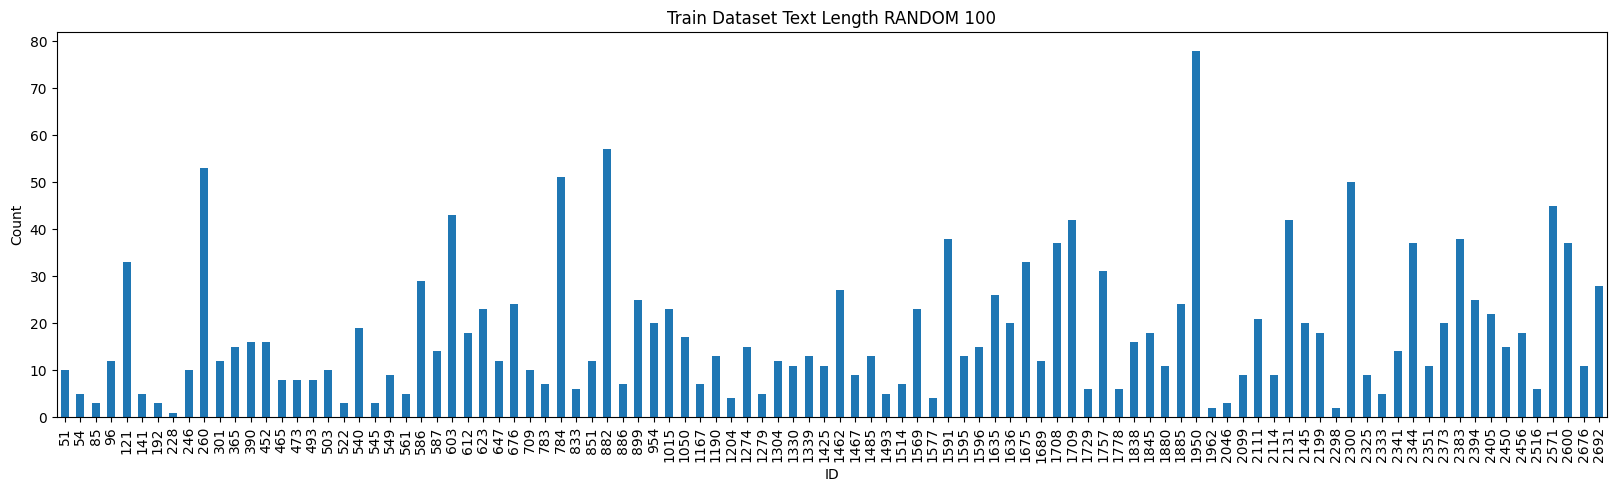

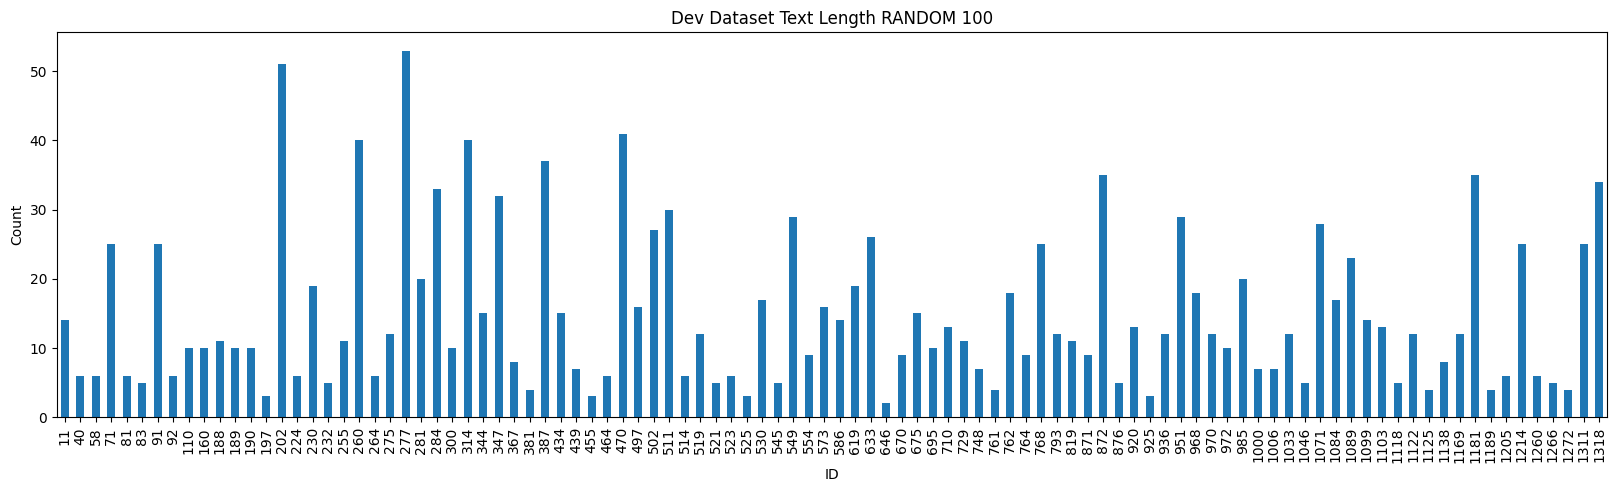

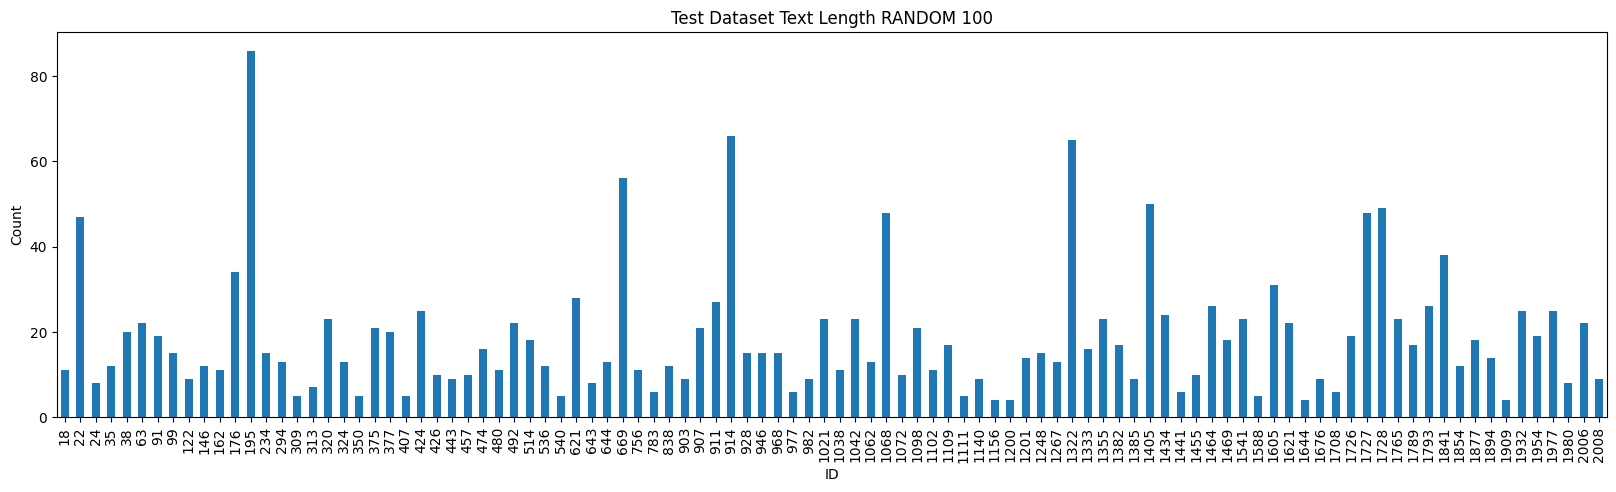

In [16]:
train['text_lenght'] = train['text'].apply(lambda x : len(x.split()))
dev['text_lenght'] = dev['text'].apply(lambda x : len(x.split()))
test['text_lenght'] = test['text'].apply(lambda x : len(x.split()))

show_bar(train['text_lenght'], "Train Dataset Text Length RANDOM 100")
show_bar(dev['text_lenght'], "Dev Dataset Text Length RANDOM 100")
show_bar(test['text_lenght'], "Test Dataset Text Length RANDOM 100")

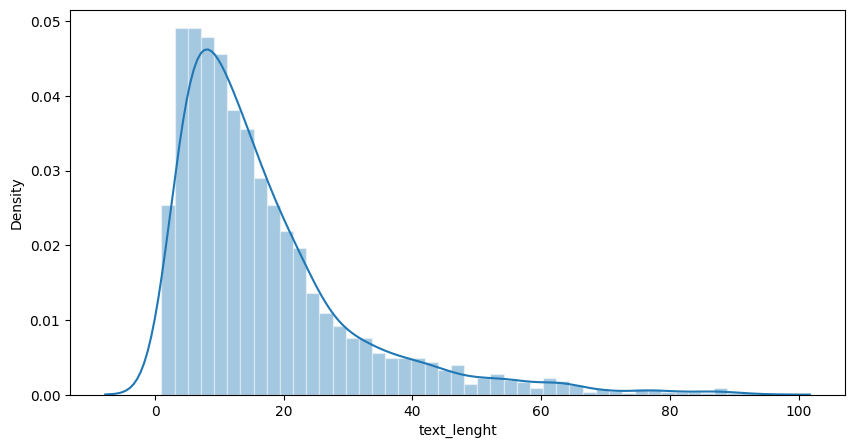

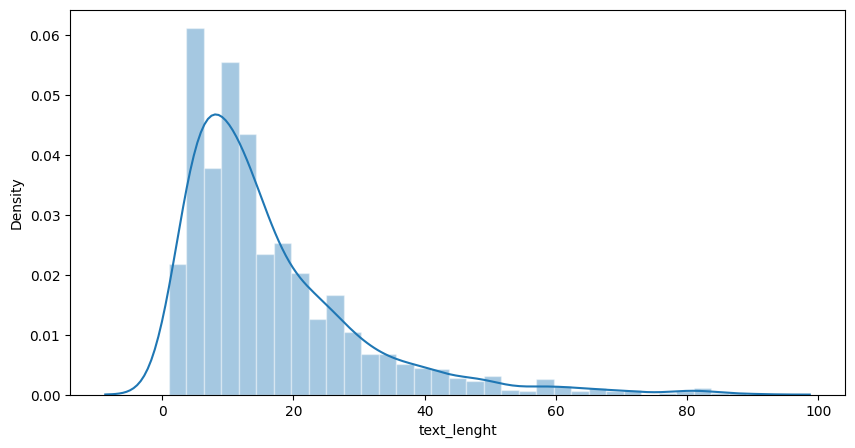

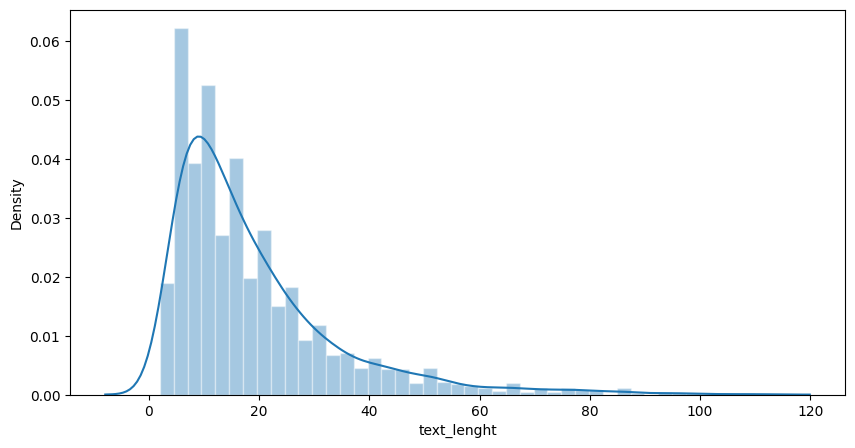

In [19]:
show_dist(train['text_lenght'])
show_dist(dev['text_lenght'])
show_dist(test['text_lenght'])

In [3]:
%%capture
!pip install wordcloud
!pip install bnlp_toolkit

In [4]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2023-09-02 12:45:19--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.67.153.233, 104.21.12.234, 2606:4700:3030::ac43:99e9, ...
Connecting to www.omicronlab.com (www.omicronlab.com)|172.67.153.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf’

kalpurush.ttf       100%[===================>] 307.22K  --.-KB/s    in 0.02s   

2023-09-02 12:45:20 (13.5 MB/s) - ‘kalpurush.ttf’ saved [314592/314592]



In [5]:
import re
from wordcloud import WordCloud
import bnlp.corpus as cp
stopwords = cp.corpus.BengaliCorpus.stopwords
punctuations = cp.corpus.BengaliCorpus.punctuations

def plot_world(text):

    wordcloud = WordCloud(
        width = 500,
        height = 500,
        background_color ='black',
        font_path="kalpurush.ttf",
        min_font_size = 10,
        regexp=r"[\u0980-\u09FF]+",
    ).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    return text

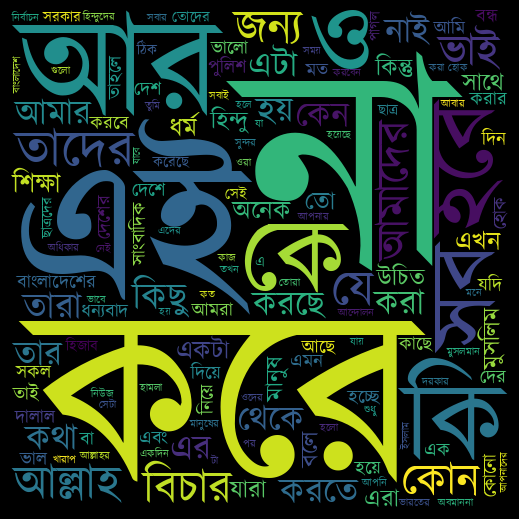

In [12]:
s= " ".join(train['text'][:1000])
plot_world(clean(s))